<center><h1>Principal Component Analysis</h1></center>

> [Helpful Link](https://builtin.com/data-science/step-step-explanation-principal-component-analysis)

### `import` Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.linalg import eigh
from matplotlib import pyplot as plt

### Data Preparation

In [2]:
size = (500, 10)
cols = [str('col') + str(i) for i in range(size[1])]
data = np.random.randint(low=5, high=20, size=size)
data = pd.DataFrame(data=data, columns=cols)

In [3]:
data.head()

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9
0,13,9,18,10,5,16,9,18,18,14
1,8,18,9,12,11,5,17,10,15,9
2,15,16,17,6,10,15,8,8,6,7
3,16,6,12,8,7,12,10,17,12,8
4,16,11,12,15,7,19,16,15,6,7


### Standardization of the Data

$$Z = \frac{(x_i - \mu_x)}{\sigma_x}$$

In [4]:
# from sklearn.preprocessing import StandardScaler
# stz_data = StandardScaler().fit_transform(data)

def standardize_data_features(data, in_numpy=False):
    data_copy = data.copy()
    
    for col in data_copy.columns:
        mean_val = np.mean(data_copy[col])
        std_dev_val = np.std(data_copy[col])
        data_copy[col] = (data_copy[col] - mean_val) / std_dev_val
    
    if not in_numpy:
        return data_copy
    return data_copy.to_numpy()

In [5]:
stz_data = standardize_data_features(data=data)

In [6]:
stz_data.head()

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9
0,0.188390,-0.689761,1.329134,-0.498226,-1.609040,0.915397,-0.666361,1.395555,1.395731,0.471544
1,-0.983191,1.385055,-0.739021,-0.030408,-0.226703,-1.573324,1.213360,-0.452250,0.689866,-0.689894
2,0.657023,0.923985,1.099339,-1.433860,-0.457093,0.689149,-0.901327,-0.914201,-1.427730,-1.154469
3,0.891339,-1.381366,-0.049636,-0.966043,-1.148261,0.010407,-0.431396,1.164579,-0.016000,-0.922182
4,0.891339,-0.228691,-0.049636,0.671318,-1.148261,1.594139,0.978395,0.702628,-1.427730,-1.154469


### Co-Variance Matrix Computation

$$\text{Cov(X, Y)} = \frac{1}{(n - 1)} \sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})$$

In [7]:
def compute_covariance(X, Y):
    mean_x = np.mean(X)
    mean_y = np.mean(Y)
    
    X_ = X - mean_x
    Y_ = Y - mean_y
    cov_val = np.dot(X_, Y_)/(X.shape[0] - 1)
    
    return cov_val

In [8]:
def compute_covariance_matrix(data):
    cm = [
        np.array([compute_covariance(X=data[col_i], Y=data[col_j]) for col_j in data.columns]) 
        for col_i in data.columns
    ]
    return np.array(cm)

In [9]:
cov_mat = compute_covariance_matrix(data=stz_data)

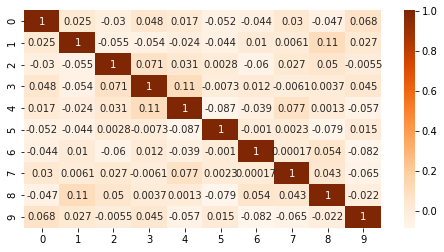

In [10]:
plt.figure(figsize=(8, 4))
sns.heatmap(data=cov_mat, annot=True, cmap='Oranges')
plt.show()

In [11]:
cov_mat.shape

(10, 10)

### Computation of Eigen Values and Eigen Vectors

> [Helpful Video](https://www.youtube.com/watch?v=h8sg_XBp6VA&ab_channel=SolveIt)

In [12]:
def compute_eigen_vv(data_matrix, shrink_to=2):
    best_features = tuple(range(data_matrix.shape[0]))[-shrink_to:]
    print(best_features)
    evalues, evectors = eigh(a=data_matrix, eigvals=best_features)
    evectors = evectors.T
    return evalues, evectors

In [13]:
compute_eigen_vv(data_matrix=cov_mat)

(8, 9)


(array([1.20059486, 1.21870774]),
 array([[ 0.25953548, -0.38751536,  0.13320697,  0.28531024,  0.03169712,
          0.23324894, -0.41085902, -0.19011163, -0.5185349 ,  0.39254473],
        [-0.14728072,  0.09177732, -0.34392075, -0.43014737, -0.59970138,
          0.34405886,  0.10667891, -0.3415664 , -0.19528698,  0.14957878]]))

### Recasting the Data to Reduced Dimensions

In [14]:
_, vecs = compute_eigen_vv(data_matrix=cov_mat)
stz_data = stz_data.to_numpy()

(8, 9)


In [15]:
vecs.shape

(2, 10)

In [16]:
stz_data.shape

(500, 10)

In [17]:
reduced_data = np.dot(vecs, stz_data.T)

In [18]:
reduced_data.shape

(2, 500)

In [19]:
reduced_data = reduced_data.T

### Final Reduced DataFrame

In [20]:
rdf = pd.DataFrame(data=reduced_data, columns=['f1', 'f2'])

In [21]:
rdf.head()

,f1,f2
0,-0.016562,0.196240
1,-2.314259,0.179802
2,0.527327,1.060188
3,0.052574,0.288135
4,0.591899,0.783644


### End